In [1]:
import yt 
import yt_xarray 
from scipy.io import loadmat
import os
import matplotlib.pyplot as plt
import numpy as np 

load_dir = '/Users/chavlin/data/vbr_related/christian_data'

data = {}

for file, field in zip(['S_vel_to_share.mat', 'P_vel_to_share.mat', 'S_atten_to_share.mat'],
                       ['grd_s_vel', 'grd_p_vel', 'grd_atten_s']):
    fname = os.path.join(load_dir, file)
    
    vels = loadmat(fname,              
                struct_as_record=False,
                squeeze_me=True,)
    data[field] = vels[field].val

# get the right limits
lon_x_range = (-170, -130)
lat_y_range = (50, 75)
depth_range = (0, 500) 

bbox = np.array([lat_y_range, lon_x_range, depth_range])

sz = data[field].shape

ds = yt.load_uniform_grid(data, sz, length_unit=1, bbox=bbox, axis_order=('latitude', 'longitude', 'depth'), geometry='internal_geographic')

def _fast_vels_s(field, data):
    vals = data['stream', 'grd_s_vel'].copy()
    vals[vals<0] = 0
    return vals 

def _slow_vels_s(field, data):
    vals = data['stream', 'grd_s_vel'].copy()
    vals[vals>0] = 0
    return np.abs(vals)

ds.add_field(
    name=("stream", "fast_s"),
    function=_fast_vels_s,
    sampling_type="local",
    units="",
    take_log=False,
)

ds.add_field(
    name=("stream", "slow_s"),
    function=_slow_vels_s,
    sampling_type="local",
    units="",
    take_log=False,
)

yt : [INFO     ] 2025-08-01 23:43:45,841 Parameters: current_time              = 0.0
yt : [INFO     ] 2025-08-01 23:43:45,842 Parameters: domain_dimensions         = [ 69 103  26]
yt : [INFO     ] 2025-08-01 23:43:45,842 Parameters: domain_left_edge          = [  50. -170.    0.]
yt : [INFO     ] 2025-08-01 23:43:45,843 Parameters: domain_right_edge         = [  75. -130.  500.]
yt : [INFO     ] 2025-08-01 23:43:45,843 Parameters: cosmological_simulation   = 0


yt : [INFO     ] 2025-08-01 23:43:49,644 xlim = -170.000000 -130.000000
yt : [INFO     ] 2025-08-01 23:43:49,644 ylim = 50.000000 75.000000
yt : [INFO     ] 2025-08-01 23:43:49,645 Setting origin='native' for internal_geographic geometry.
yt : [INFO     ] 2025-08-01 23:43:49,649 xlim = -170.000000 -130.000000
yt : [INFO     ] 2025-08-01 23:43:49,650 ylim = 50.000000 75.000000
yt : [INFO     ] 2025-08-01 23:43:49,718 Making a fixed resolution buffer of (('stream', 'grd_s_vel')) 800 by 800



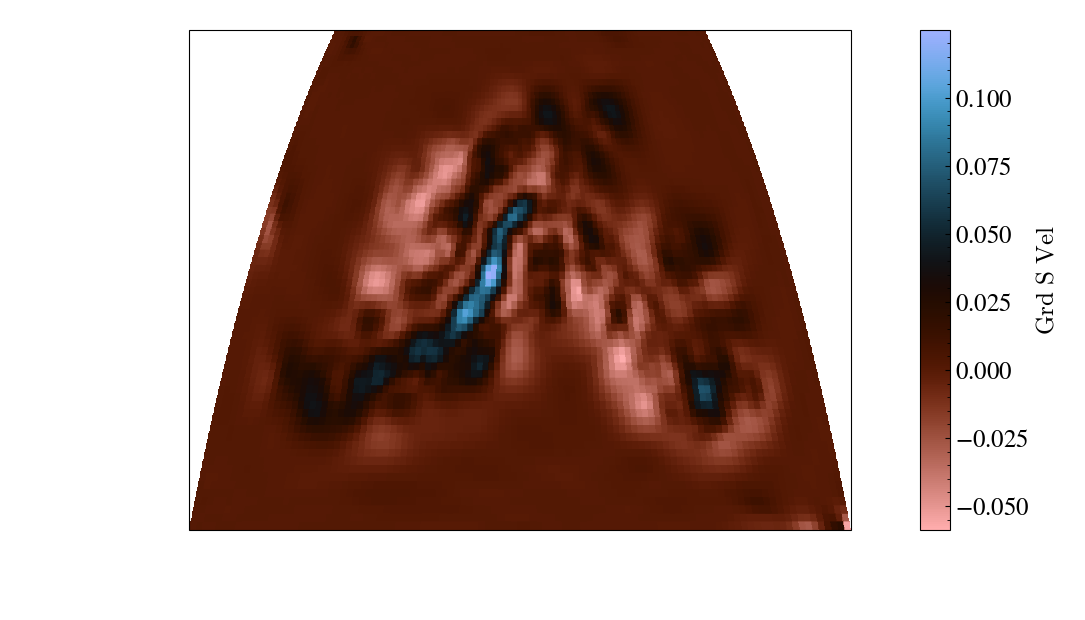

In [2]:
fld = ('stream', 'grd_s_vel')
center = ds.domain_center.copy()
center[2] = 150
slc = yt.SlicePlot(ds, 'depth', fld, center=center)
slc.set_log(fld, False)
slc.set_cmap(fld, 'berlin_r')
slc.set_mpl_projection(('Mollweide', (), {'central_longitude':center[1].d}))
slc.render()

slc

yt : [INFO     ] 2025-08-01 23:43:52,814 xlim = -170.000000 -130.000000
yt : [INFO     ] 2025-08-01 23:43:52,814 ylim = 50.000000 75.000000
yt : [INFO     ] 2025-08-01 23:43:52,814 Setting origin='native' for internal_geographic geometry.
yt : [INFO     ] 2025-08-01 23:43:52,816 xlim = -170.000000 -130.000000
yt : [INFO     ] 2025-08-01 23:43:52,816 ylim = 50.000000 75.000000
yt : [INFO     ] 2025-08-01 23:43:52,817 Making a fixed resolution buffer of (('stream', 'fast_s')) 800 by 800



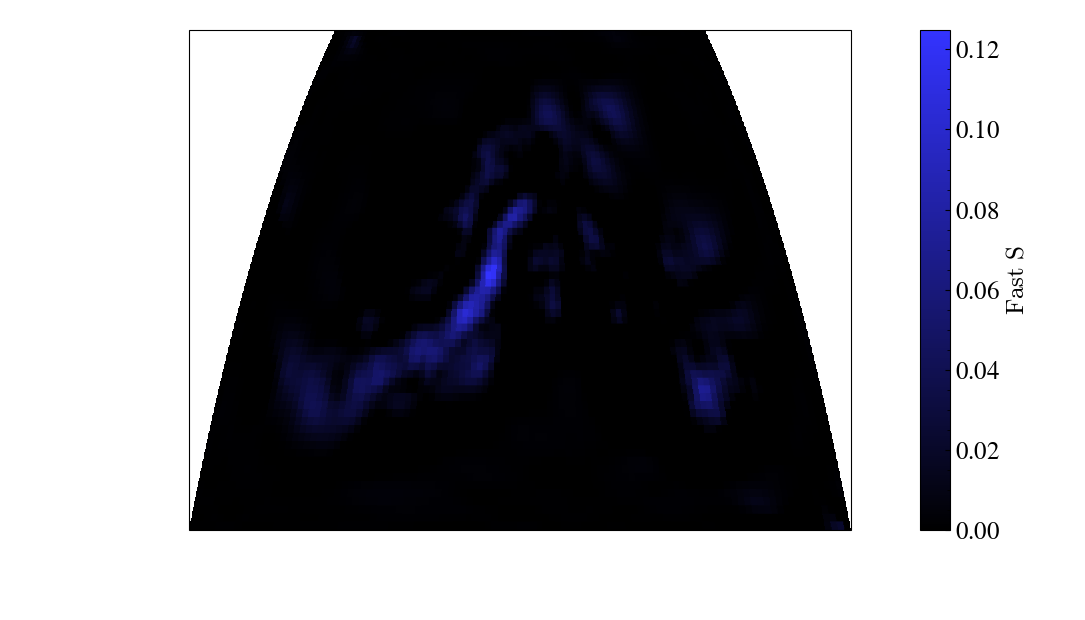

In [3]:
fld = ('stream', 'fast_s')
center = ds.domain_center.copy()
center[2] = 150
slc = yt.SlicePlot(ds, 'depth', fld, center=center)
slc.set_log(fld, False)
slc.set_cmap(fld, 'cmyt.pixel_blue')
slc.set_mpl_projection(('Mollweide', (), {'central_longitude':center[1].d}))
slc.render()
slc

yt : [INFO     ] 2025-08-01 23:43:55,700 xlim = -170.000000 -130.000000
yt : [INFO     ] 2025-08-01 23:43:55,701 ylim = 50.000000 75.000000
yt : [INFO     ] 2025-08-01 23:43:55,701 Setting origin='native' for internal_geographic geometry.
yt : [INFO     ] 2025-08-01 23:43:55,702 xlim = -170.000000 -130.000000
yt : [INFO     ] 2025-08-01 23:43:55,702 ylim = 50.000000 75.000000
yt : [INFO     ] 2025-08-01 23:43:55,703 Making a fixed resolution buffer of (('stream', 'slow_s')) 800 by 800



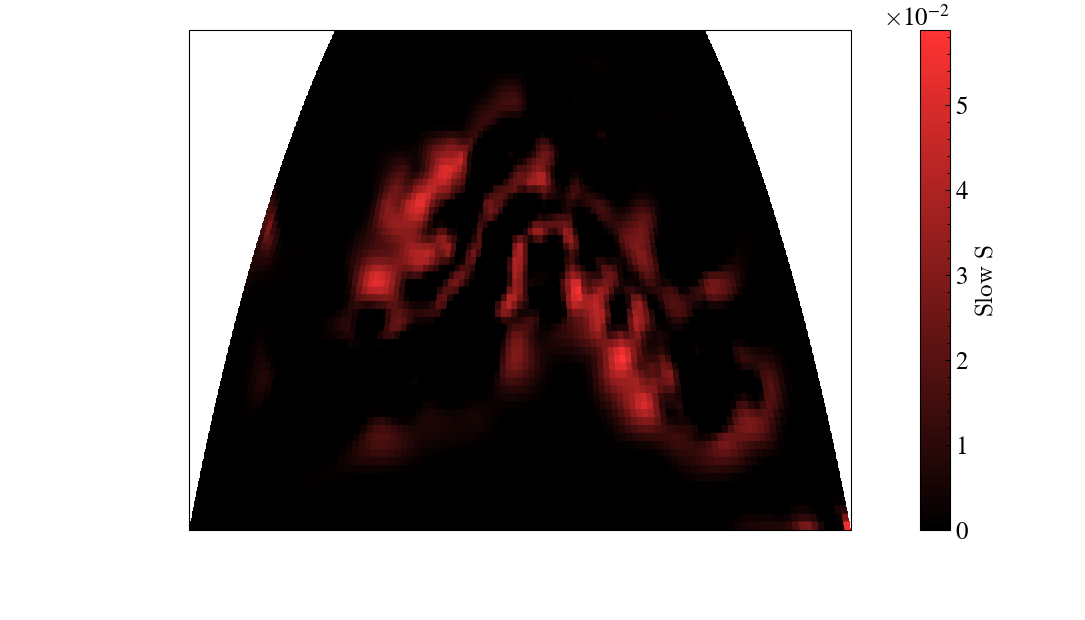

In [4]:
fld = ('stream', 'slow_s')
center = ds.domain_center.copy()
center[2] = 150
slc = yt.SlicePlot(ds, 'depth', fld, center=center)
slc.set_log(fld, False)
slc.set_cmap(fld, 'cmyt.pixel_red')
slc.set_mpl_projection(('Mollweide', (), {'central_longitude':center[1].d}))
slc.render()
slc

In [5]:
from yt_xarray import transformations as tf
import yt_xarray
import yt 
import xarray as xr 
import os 
from scipy.io import loadmat

In [6]:
data = {}

for file, field in zip(['S_vel_to_share.mat', 'P_vel_to_share.mat', 'S_atten_to_share.mat'],
                       ['grd_s_vel', 'grd_p_vel', 'grd_atten_s']):
    fname = os.path.join(load_dir, file)
    
    vels = loadmat(fname,              
                struct_as_record=False,
                squeeze_me=True,)
    data[field] = vels[field].val


shp = data[field].shape
shp

(69, 103, 26)

In [7]:


coords = []
axis_order=('latitude', 'longitude', 'depth')
for iax, ax in enumerate(axis_order):
    rangevals = bbox[iax]    
    coords.append(np.linspace(rangevals[0], rangevals[1], shp[iax]))

das = {}
for field, vals in data.items():
    das[field] = xr.DataArray(vals, coords=coords, dims=axis_order)

In [8]:
ds_x = xr.Dataset(data_vars=das)

In [9]:
ds_x

<xarray.Dataset> Size: 4MB
Dimensions:      (latitude: 69, longitude: 103, depth: 26)
Coordinates:
  * latitude     (latitude) float64 552B 50.0 50.37 50.74 ... 74.26 74.63 75.0
  * longitude    (longitude) float64 824B -170.0 -169.6 -169.2 ... -130.4 -130.0
  * depth        (depth) float64 208B 0.0 20.0 40.0 60.0 ... 460.0 480.0 500.0
Data variables:
    grd_s_vel    (latitude, longitude, depth) float64 1MB -0.0001595 ... 0.00...
    grd_p_vel    (latitude, longitude, depth) float64 1MB 0.0002626 ... 0.000...
    grd_atten_s  (latitude, longitude, depth) float64 1MB -0.008413 ... -0.00...

In [10]:
grid_resolution = (32, 32, 32)
gc = tf.GeocentricCartesian(radial_type='depth', r_o=6371., use_neg_lons=True)
ds_yt = tf.build_interpolated_cartesian_ds(
    ds_x,
    gc,
    fields = ['grd_s_vel', 'grd_p_vel', 'grd_atten_s'] ,   
    grid_resolution = grid_resolution, 
    refine_grid=True,    
    refine_max_iters=2000,
    refine_min_grid_size=4,
    refine_by=4,
    interp_method='interpolate',
)


def _fast_vels_s(field, data):
    vals = data['stream', 'grd_s_vel'].copy()
    vals[vals<0] = 0
    vals[np.isnan(vals)] = 0.0
    return vals 

def _slow_vels_s(field, data):
    vals = data['stream', 'grd_s_vel'].copy()
    vals[vals>0] = 0
    vals[np.isnan(vals)] = 0.0
    return np.abs(vals)

ds_yt.add_field(
    name=("stream", "fast_s"),
    function=_fast_vels_s,
    sampling_type="local",
    units="",
    take_log=False,
)

ds_yt.add_field(
    name=("stream", "slow_s"),
    function=_slow_vels_s,
    sampling_type="local",
    units="",
    take_log=False,
)

yt_xarray : [INFO ] 2025-08-01 23:43:58,764:  Creating image mask for grid decomposition.
yt_xarray : [INFO ] 2025-08-01 23:43:59,041:  Decomposing image mask and building yt dataset.
yt_xarray : [INFO ] 2025-08-01 23:43:59,068:  Decomposed into 830 grids after 1047 iterations.
yt : [INFO     ] 2025-08-01 23:43:59,111 Parameters: current_time              = 0.0
yt : [INFO     ] 2025-08-01 23:43:59,112 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2025-08-01 23:43:59,112 Parameters: domain_left_edge          = [-4033. -3138.  4497.]
yt : [INFO     ] 2025-08-01 23:43:59,112 Parameters: domain_right_edge         = [-976. -263. 6154.]
yt : [INFO     ] 2025-08-01 23:43:59,112 Parameters: cosmological_simulation   = 0


yt : [INFO     ] 2025-08-01 23:43:59,501 xlim = -3138.000000 -263.000000
yt : [INFO     ] 2025-08-01 23:43:59,501 ylim = 4497.000000 6154.000000
yt : [INFO     ] 2025-08-01 23:43:59,502 xlim = -3138.000000 -263.000000
yt : [INFO     ] 2025-08-01 23:43:59,503 ylim = 4497.000000 6154.000000
yt : [INFO     ] 2025-08-01 23:43:59,504 Making a fixed resolution buffer of (('stream', 'grd_s_vel')) 800 by 800



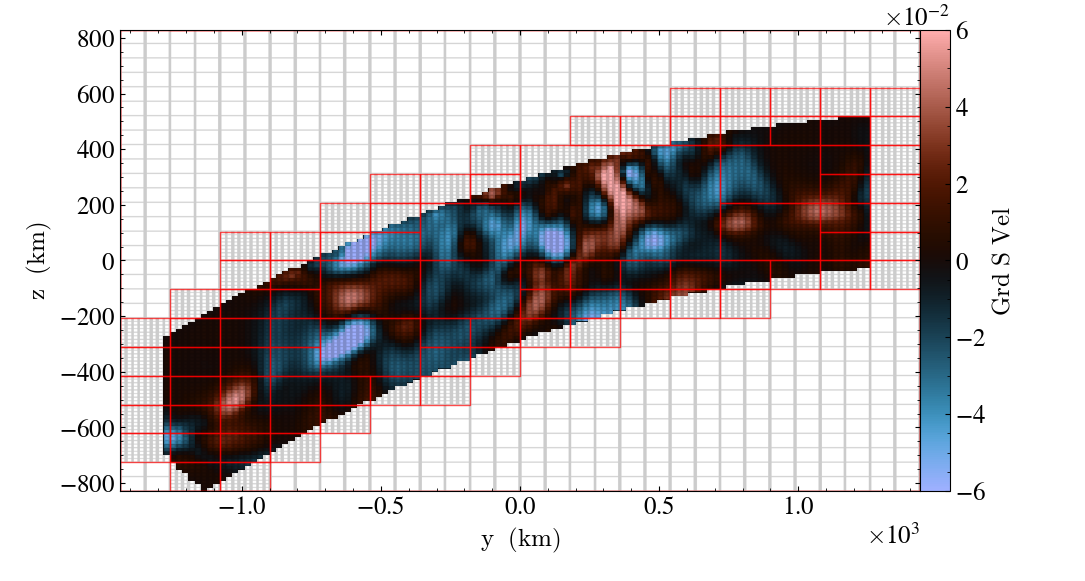

In [11]:
slc = yt.SlicePlot(ds_yt, 'x', ('stream', 'grd_s_vel'))
slc.set_log(('stream', 'grd_s_vel'), False)
slc.set_zlim(('stream', 'grd_s_vel'), -.06, .06)
slc.set_cmap(('stream', 'grd_s_vel'),'berlin')
slc.annotate_cell_edges(alpha=0.2)
slc.annotate_grids(edgecolors=(1.,0,0,0))
slc.show()

yt : [INFO     ] 2025-08-01 23:44:00,094 xlim = -4033.000000 -976.000000
yt : [INFO     ] 2025-08-01 23:44:00,094 ylim = -3138.000000 -263.000000
yt : [INFO     ] 2025-08-01 23:44:00,095 xlim = -4033.000000 -976.000000
yt : [INFO     ] 2025-08-01 23:44:00,095 ylim = -3138.000000 -263.000000
yt : [INFO     ] 2025-08-01 23:44:00,096 Making a fixed resolution buffer of (('stream', 'grd_s_vel')) 800 by 800



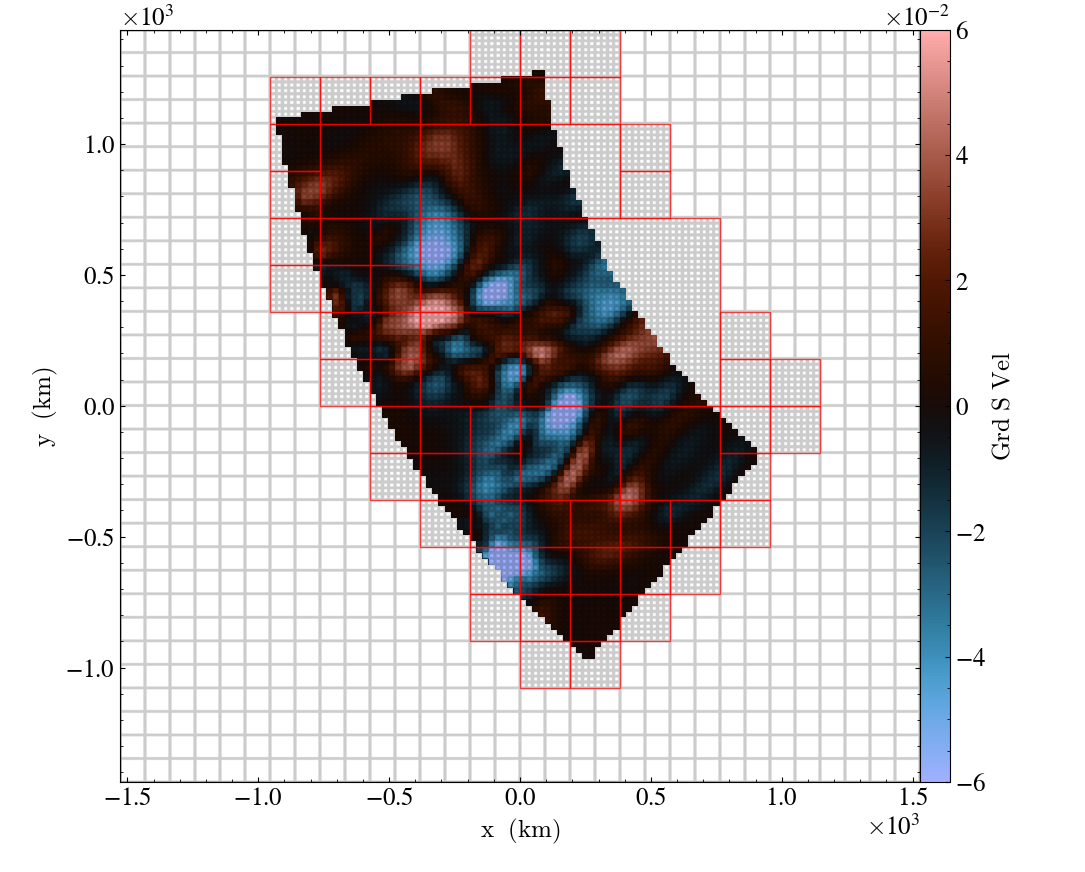

In [12]:
slc = yt.SlicePlot(ds_yt, 'z', ('stream', 'grd_s_vel'))
slc.set_log(('stream', 'grd_s_vel'), False)
slc.set_zlim(('stream', 'grd_s_vel'), -.06, .06)
slc.set_cmap(('stream', 'grd_s_vel'),'berlin')
slc.annotate_cell_edges(alpha=0.2)
slc.annotate_grids(edgecolors=(1.,0,0,0))
slc.show()

yt : [INFO     ] 2025-08-01 23:44:00,708 xlim = -3138.000000 -263.000000
yt : [INFO     ] 2025-08-01 23:44:00,708 ylim = 4497.000000 6154.000000
yt : [INFO     ] 2025-08-01 23:44:00,709 xlim = -3138.000000 -263.000000
yt : [INFO     ] 2025-08-01 23:44:00,710 ylim = 4497.000000 6154.000000
yt : [INFO     ] 2025-08-01 23:44:00,710 Making a fixed resolution buffer of (('stream', 'fast_s')) 800 by 800



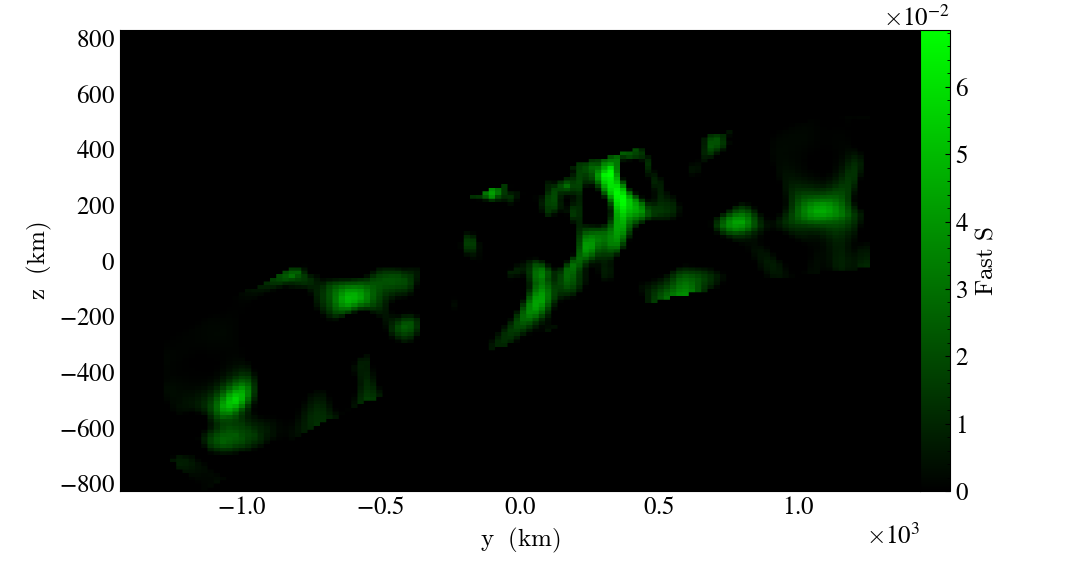

In [13]:
slc = yt.SlicePlot(ds_yt, 'x', ('stream', 'fast_s'))
slc.set_log(('stream', 'fast_s'), False)
slc.set_cmap(('stream', 'fast_s'),'cmyt.pixel_green')


In [14]:
import cartopy 
from dask import delayed, compute 
import shapely 

from yt.visualization.volume_rendering.render_source import LineSource

def transform_geom_bounds(linesegs, xy, gc):
    lons = np.array(xy[0])
    lons[lons>180] = lons[lons>180] - 360.
    lats = np.array(xy[1])

    coords = {'latitude': lats, 'longitude': lons, gc.radial_axis: 0.0}
    x, y, z = gc.to_transformed(**coords)

    for iseg in range(len(x) - 1):
        lineseg = [[x[iseg], y[iseg], z[iseg]], [x[iseg + 1], y[iseg + 1], z[iseg + 1]]]
        linesegs.append(lineseg)
    return linesegs
    
def process_state(state, gc):
    linesegs = []
    if isinstance(state, shapely.geometry.polygon.Polygon):
        geoms_iter = [state,]
    elif isinstance(state, shapely.geometry.multipolygon.MultiPolygon):
        geoms_iter = state.geoms
    else:
        msg = f"Unexpected geometry type: {type(state)}"
        raise TypeError(msg)

    for geom in geoms_iter:
         linesegs = transform_geom_bounds(linesegs, geom.boundary.xy, gc)
    return linesegs
    
def build_state_line_sources(gc: tf.Transformer):
    state_segs = []
    for s in cartopy.feature.STATES.geometries():
        state_segs.append(delayed(process_state)(s, gc))

    # for s in cartopy.feature.COASTLINE.geometries():
    #     state_segs.append(delayed(process_state)(s, gc))

    state_segs = np.concatenate(compute(*state_segs))
    colors = np.ones((state_segs.shape[0], 4))
    colors[:, 3] = 0.1
    lsrc = LineSource(state_segs, colors=colors)
    return lsrc

In [15]:

lsrc = build_state_line_sources(gc)


yt : [INFO     ] 2025-08-01 23:44:01,035 Rendering scene (Can take a while).
yt : [INFO     ] 2025-08-01 23:44:01,038 Creating volume
yt : [INFO     ] 2025-08-01 23:44:05,178 Creating transfer function


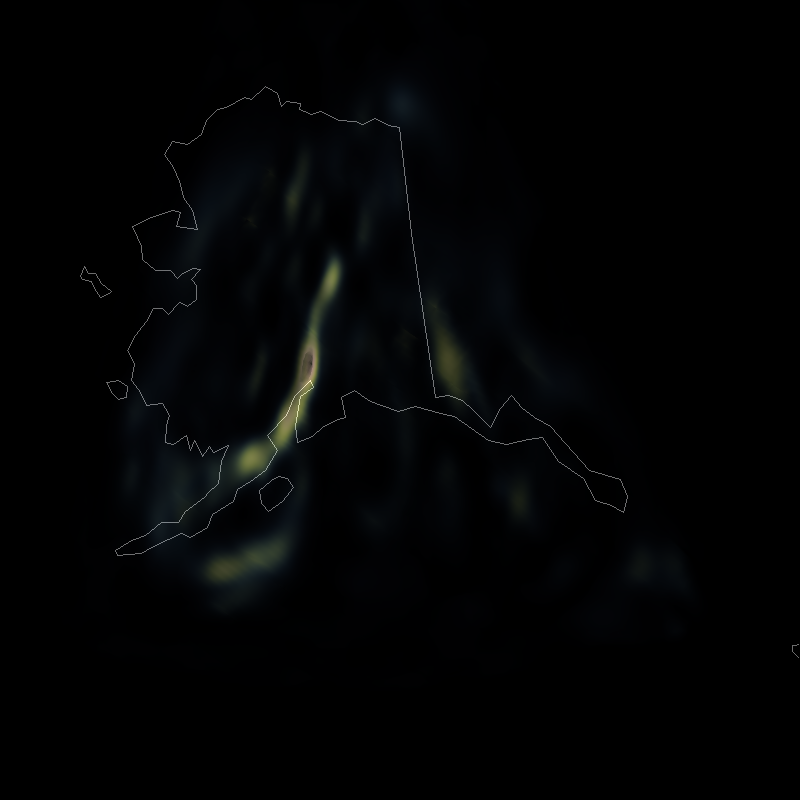

In [16]:
sc = yt.create_scene(ds_yt, field=('stream', 'fast_s'))

sc.add_source(lsrc)

# adjust camera
cam = sc.add_camera(ds_yt)
cam.zoom(1.5)

cam.yaw(100*np.pi/180)
cam.roll(-80*np.pi/180)
# cam.rotate(45*np.pi/180)
cam.set_resolution((800,800))

# transfer function 
source = sc[0]
source.tfh.set_bounds((0.001, 0.1))
source.tfh.set_log(True)

sc.show()

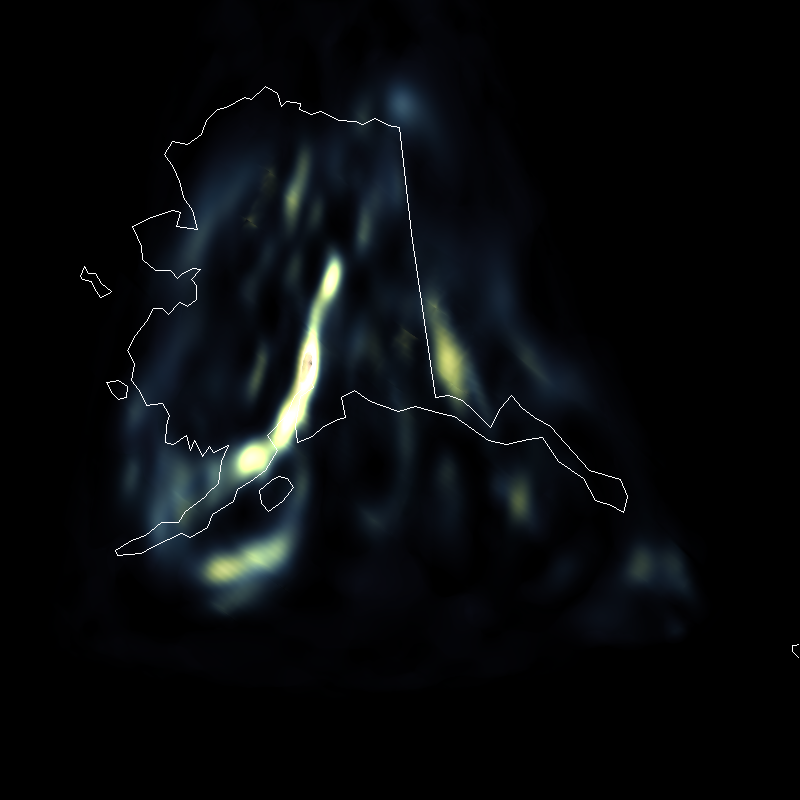

In [17]:
sc.show(sigma_clip=5)

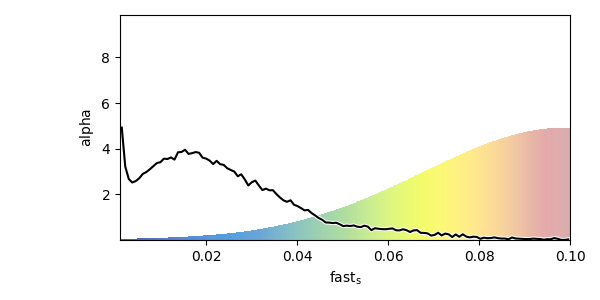

In [18]:
source.tfh.plot(profile_field=('stream','fast_s'))

yt : [INFO     ] 2025-08-01 23:44:12,909 Rendering scene (Can take a while).
yt : [INFO     ] 2025-08-01 23:44:12,913 Creating volume


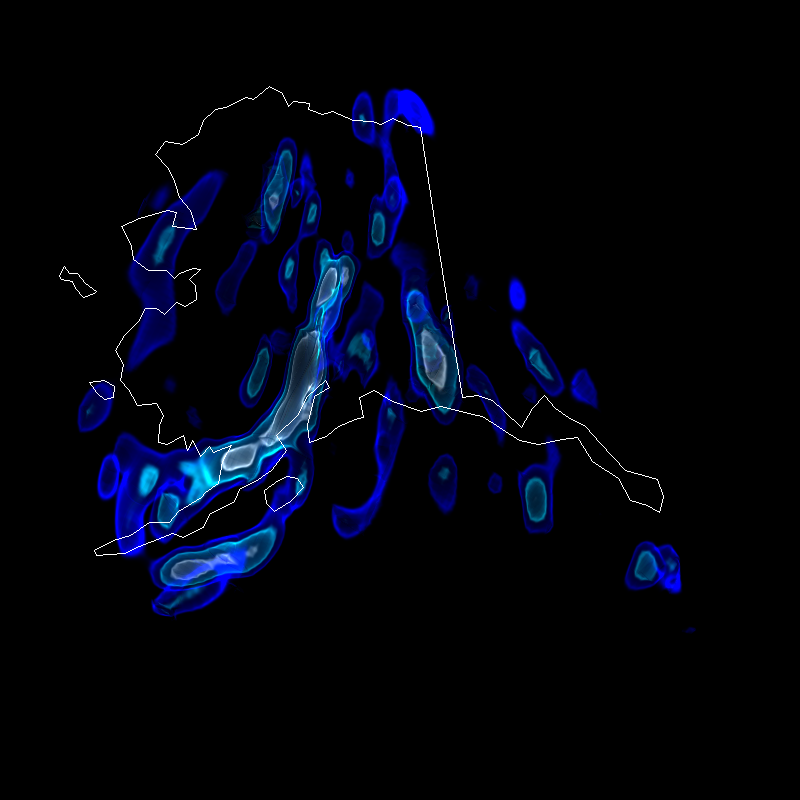

In [19]:
fld = ('stream', 'fast_s')
sc = yt.create_scene(ds_yt, field=fld)


source = sc[0]

source.set_field(fld)
source.set_log(False)

sc.add_source(lsrc)

bounds = (0.001, 0.15)

# Since this rendering is done in log space, the transfer function needs
# to be specified in log space.
tf = yt.ColorTransferFunction(bounds)

# tf.add_gaussian(0.018, width=0.00001, height=[0., 1.0, 0, 1.0])
tf.add_gaussian(0.03, width=0.00001, height=[0., 0.0, 1.0, 1.0])
tf.add_gaussian(0.045, width=0.00001, height=[0., 1.0, 1.0, 1.0])
tf.add_gaussian(0.065, width=0.00001, height=[1., 1.0, 1.0, 1.0])

source.tfh.tf = tf
source.tfh.bounds = bounds



# adjust camera
cam = sc.add_camera(ds_yt)

cam.zoom(1.5)

cam.yaw(100*np.pi/180)
cam.roll(-80*np.pi/180)
cam.rotate(-20*np.pi/180)
cam.set_resolution((800,800))


sc.render()
sc.show(sigma_clip=1.5)

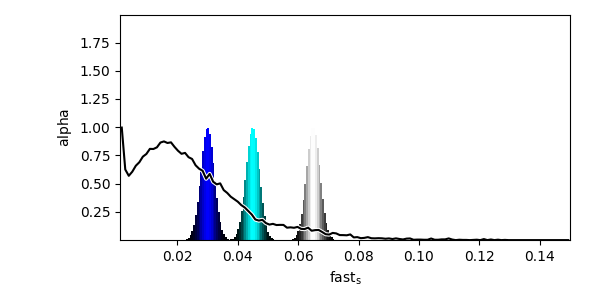

In [20]:
source.tfh.plot(profile_field=fld)

yt : [INFO     ] 2025-08-01 23:44:22,746 Rendering scene (Can take a while).


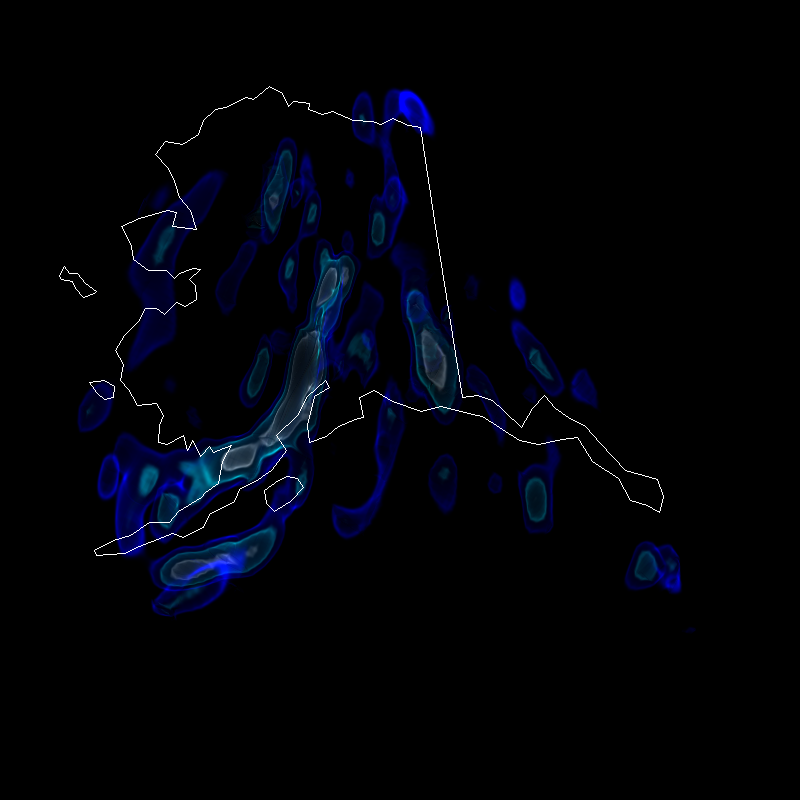

In [21]:

# cam.yaw(100*np.pi/180)
# cam.roll(20*np.pi/180)
# cam.rotate(-20*np.pi/180)

sc.render()
sc.show(sigma_clip=3)

In [102]:
if not os.path.isdir('frames'):
    os.mkdir('frames')

In [109]:
def gen_a_frame(yaw:float, roll:float, rotate:float, frame_index, zoom:float=1.5):
    fld = ('stream', 'fast_s')
    sc = yt.create_scene(ds_yt, field=fld)
    
    source = sc[0]
    
    source.set_field(fld)
    source.set_log(False)
    
    sc.add_source(lsrc)
    
    bounds = (0.001, 0.15)
    
    # Since this rendering is done in log space, the transfer function needs
    # to be specified in log space.
    tf = yt.ColorTransferFunction(bounds)
    
    tf.add_gaussian(0.018, width=0.00001, height=[0., 1.0, 0, 1.0])
    tf.add_gaussian(0.03, width=0.00001, height=[0., 0.0, 1.0, 1.0])
    tf.add_gaussian(0.045, width=0.00001, height=[0., 1.0, 1.0, 1.0])
    tf.add_gaussian(0.065, width=0.00001, height=[1., 1.0, 1.0, 1.0])
    
    source.tfh.tf = tf
    source.tfh.bounds = bounds
    
    
    # adjust camera
    cam = sc.add_camera(ds_yt)
    
    cam.zoom(zoom)
    
    cam.yaw(yaw*np.pi/180)
    cam.roll(roll*np.pi/180)
    cam.rotate(rotate*np.pi/180)
    cam.set_resolution((800,800))
    
    sc.render()
    fname = os.path.join('frames', f"frame_{str(frame_index).zfill(4)}.png")
    sc.save(fname, sigma_clip=3, render=False)

In [111]:
for iframe, yaw in enumerate(list(range(100,200, 10))):
    gen_a_frame(yaw, -80, -20, iframe)

yt : [INFO     ] 2025-08-01 22:19:25,091 Rendering scene (Can take a while).
yt : [INFO     ] 2025-08-01 22:19:25,097 Creating volume
yt : [INFO     ] 2025-08-01 22:19:32,504 Found previously rendered image to save.
yt : [INFO     ] 2025-08-01 22:19:32,505 Saving rendered image to frames/frame_0000.png
yt : [INFO     ] 2025-08-01 22:19:32,625 Rendering scene (Can take a while).
yt : [INFO     ] 2025-08-01 22:19:32,629 Creating volume
yt : [INFO     ] 2025-08-01 22:19:40,211 Found previously rendered image to save.
yt : [INFO     ] 2025-08-01 22:19:40,211 Saving rendered image to frames/frame_0001.png
yt : [INFO     ] 2025-08-01 22:19:40,333 Rendering scene (Can take a while).
yt : [INFO     ] 2025-08-01 22:19:40,336 Creating volume
yt : [INFO     ] 2025-08-01 22:19:48,005 Found previously rendered image to save.
yt : [INFO     ] 2025-08-01 22:19:48,006 Saving rendered image to frames/frame_0002.png
yt : [INFO     ] 2025-08-01 22:19:48,120 Rendering scene (Can take a while).
yt : [INFO 

KeyboardInterrupt: 

In [ ]:
max_iframe = 10
for iframe, roll in enumerate(list(range(-80,80, 10))):
    gen_a_frame(100, roll, -20, iframe+max_iframe)

In [122]:
ds.domain_center

unyt_array([  62.5, -150. ,  250. ], 'code_length')

In [117]:
pt = np.array(gc.to_transformed(latitude=30, longitude=-150, depth=250))

array([-4590.75      , -2650.47074828,  3060.5       ])

In [134]:
ds.domain_center

unyt_array([  62.5, -150. ,  250. ], 'code_length')

yt : [INFO     ] 2025-08-01 22:35:34,591 Rendering scene (Can take a while).
yt : [INFO     ] 2025-08-01 22:35:34,595 Creating volume


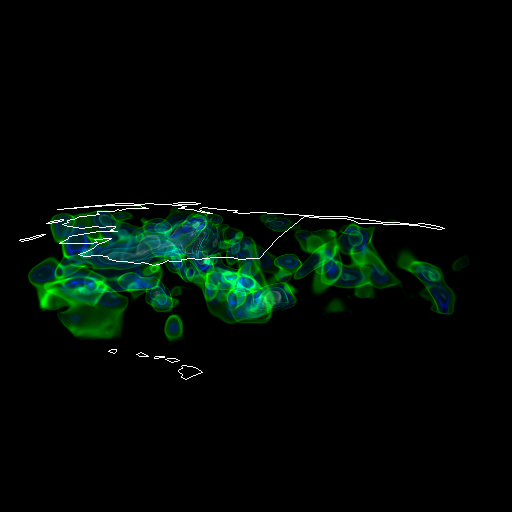

In [155]:

fld = ('stream', 'fast_s')
sc = yt.create_scene(ds_yt, field=fld)

source = sc[0]

source.set_field(fld)
source.set_log(False)

sc.add_source(lsrc)

bounds = (0.001, 0.15)

# Since this rendering is done in log space, the transfer function needs
# to be specified in log space.
tf = yt.ColorTransferFunction(bounds)

tf.add_gaussian(0.018, width=0.00001, height=[0., 1.0, 0, 1.0])
tf.add_gaussian(0.03, width=0.00001, height=[0., 0.0, 1.0, 1.0])
tf.add_gaussian(0.045, width=0.00001, height=[0., 1.0, 1.0, 1.0])
tf.add_gaussian(0.065, width=0.00001, height=[1., 1.0, 1.0, 1.0])

source.tfh.tf = tf
source.tfh.bounds = bounds


# adjust camera

cam = sc.add_camera(ds_yt)
cam_pos = ds_yt.arr(gc.to_transformed(latitude=40, longitude=-150, depth=200), 'code_length')

cam.set_position(cam_pos)

center_vec = ds_yt.arr(gc.to_transformed(latitude=ds.domain_center[0].d, 
                                          longitude=ds.domain_center[1].d, 
                                          depth=ds.domain_center[2].d), 'code_length')

cam.switch_orientation(north_vector = center_vec)
cam.zoom(1.6)


sc.show(sigma_clip=3)

In [ ]:
if not os.path.isdir('frames_fast'):
    os.mkdir('frames_fast')

In [22]:

def render_frame(lat, lon, depth, fname, zoomfac):
    fld = ('stream', 'fast_s')
    sc = yt.create_scene(ds_yt, field=fld)
    
    source = sc[0]
    
    source.set_field(fld)
    source.set_log(False)
    
    sc.add_source(lsrc)
    
    bounds = (0.001, 0.15)
    
    # Since this rendering is done in log space, the transfer function needs
    # to be specified in log space.
    tf = yt.ColorTransferFunction(bounds)
    
    # tf.add_gaussian(0.018, width=0.00001, height=[0., 1.0, 0, 1.0])
    tf.add_gaussian(0.03, width=0.00001, height=[0., 0.0, 1.0, 1.0])
    tf.add_gaussian(0.045, width=0.00001, height=[0., 1.0, 1.0, 1.0])
    tf.add_gaussian(0.065, width=0.00001, height=[1., 1.0, 1.0, 1.0])
    
    source.tfh.tf = tf
    source.tfh.bounds = bounds
    
    
    # adjust camera
    
    cam = sc.add_camera(ds_yt)
    cam_pos = ds_yt.arr(gc.to_transformed(latitude=lat, longitude=lon, depth=depth), 'code_length')
    
    cam.set_position(cam_pos)
    
    
    center_vec = ds_yt.arr(gc.to_transformed(latitude=ds.domain_center[0].d, 
                                              longitude=ds.domain_center[1].d, 
                                              depth=ds.domain_center[2].d), 'code_length')
    
    cam.switch_orientation(north_vector = center_vec)
    cam.zoom(zoomfac)
    cam.set_resolution((800,800))

    sc.save(fname, sigma_clip=1.5)


In [23]:
key_frames = [
    {'lat': 55, 'lon': -150, 'depth':-500, 'zoom':1.6},
    {'lat': 48, 'lon': -150, 'depth': 200, 'zoom':1.6},
    {'lat': 50, 'lon': -155, 'depth': 200, 'zoom':1.6},
    {'lat': 55, 'lon': -155, 'depth': 200, 'zoom':1.6},
    {'lat': 55, 'lon': -155, 'depth': 200, 'zoom':3},
];

n_frames = 20;
tot_frames = 0;

for ik in range(len(key_frames)-1):
    df1 = key_frames[ik]; 
    df2 = key_frames[ik+1];
    dlat = (df2['lat'] - df1['lat'])/n_frames;
    dlon = (df2['lon'] - df1['lon'])/n_frames;
    dd = (df2['depth'] - df1['depth'])/n_frames;
    dzoom = (df2['zoom'] - df1['zoom'])/n_frames;

    for iframe in range(n_frames): 
        
        lat = df1['lat'] + dlat * iframe
        lon = df1['lon'] + dlon * iframe
        depth = df1['depth'] + dd * iframe
        zoomfac = df1['zoom'] + dzoom * iframe
        ffname = os.path.join("frames2", f"frame_{str(tot_frames).zfill(5)}.png")
        render_frame(lat, lon, depth, ffname, zoomfac)
        tot_frames = 1 + tot_frames
    
    
    

yt : [WARNING  ] 2025-08-01 23:44:36,516 No previously rendered image found, rendering now.
yt : [INFO     ] 2025-08-01 23:44:36,516 Rendering scene (Can take a while).
yt : [INFO     ] 2025-08-01 23:44:36,521 Creating volume
yt : [INFO     ] 2025-08-01 23:44:43,551 Saving rendered image to frames2/frame_00000.png
yt : [WARNING  ] 2025-08-01 23:44:43,662 No previously rendered image found, rendering now.
yt : [INFO     ] 2025-08-01 23:44:43,662 Rendering scene (Can take a while).
yt : [INFO     ] 2025-08-01 23:44:43,665 Creating volume
yt : [INFO     ] 2025-08-01 23:44:50,377 Saving rendered image to frames2/frame_00001.png
yt : [WARNING  ] 2025-08-01 23:44:50,483 No previously rendered image found, rendering now.
yt : [INFO     ] 2025-08-01 23:44:50,483 Rendering scene (Can take a while).
yt : [INFO     ] 2025-08-01 23:44:50,486 Creating volume
yt : [INFO     ] 2025-08-01 23:44:57,013 Saving rendered image to frames2/frame_00002.png
yt : [WARNING  ] 2025-08-01 23:44:57,120 No previous

```
ffmpeg -framerate 6 -pattern_type glob -i '*.png' output.gif
```

In [24]:
print("done")

done


In [25]:
key_frames = [
    {'lat': 55, 'lon': -155, 'depth': 200, 'zoom':3},
    {'lat': 60, 'lon': -155, 'depth': 200, 'zoom':3},
];

n_frames = 20;

for ik in range(len(key_frames)-1):
    df1 = key_frames[ik]; 
    df2 = key_frames[ik+1];
    dlat = (df2['lat'] - df1['lat'])/n_frames;
    dlon = (df2['lon'] - df1['lon'])/n_frames;
    dd = (df2['depth'] - df1['depth'])/n_frames;
    dzoom = (df2['zoom'] - df1['zoom'])/n_frames;

    for iframe in range(n_frames): 
        
        lat = df1['lat'] + dlat * iframe
        lon = df1['lon'] + dlon * iframe
        depth = df1['depth'] + dd * iframe
        zoomfac = df1['zoom'] + dzoom * iframe
        ffname = os.path.join("frames2", f"frame_{str(tot_frames).zfill(5)}.png")
        render_frame(lat, lon, depth, ffname, zoomfac)
        tot_frames = 1 + tot_frames
    
    
    

yt : [WARNING  ] 2025-08-01 23:55:05,439 No previously rendered image found, rendering now.
yt : [INFO     ] 2025-08-01 23:55:05,440 Rendering scene (Can take a while).
yt : [INFO     ] 2025-08-01 23:55:05,444 Creating volume
yt : [INFO     ] 2025-08-01 23:55:17,559 Saving rendered image to frames2/frame_00080.png
yt : [WARNING  ] 2025-08-01 23:55:17,672 No previously rendered image found, rendering now.
yt : [INFO     ] 2025-08-01 23:55:17,672 Rendering scene (Can take a while).
yt : [INFO     ] 2025-08-01 23:55:17,675 Creating volume
yt : [INFO     ] 2025-08-01 23:55:29,786 Saving rendered image to frames2/frame_00081.png
yt : [WARNING  ] 2025-08-01 23:55:29,898 No previously rendered image found, rendering now.
yt : [INFO     ] 2025-08-01 23:55:29,898 Rendering scene (Can take a while).
yt : [INFO     ] 2025-08-01 23:55:29,902 Creating volume
yt : [INFO     ] 2025-08-01 23:55:42,111 Saving rendered image to frames2/frame_00082.png
yt : [WARNING  ] 2025-08-01 23:55:42,219 No previous

In [26]:
print('done again?')

done again?


In [27]:
key_frames = [
    
    {'lat': 55, 'lon': -155, 'depth': 200, 'zoom':3},
    {'lat': 55, 'lon': -155, 'depth': 250, 'zoom':3},
];

n_frames = 10;

for ik in range(len(key_frames)-1):
    df1 = key_frames[ik]; 
    df2 = key_frames[ik+1];
    dlat = (df2['lat'] - df1['lat'])/n_frames;
    dlon = (df2['lon'] - df1['lon'])/n_frames;
    dd = (df2['depth'] - df1['depth'])/n_frames;
    dzoom = (df2['zoom'] - df1['zoom'])/n_frames;

    for iframe in range(n_frames): 
        
        lat = df1['lat'] + dlat * iframe
        lon = df1['lon'] + dlon * iframe
        depth = df1['depth'] + dd * iframe
        zoomfac = df1['zoom'] + dzoom * iframe
        ffname = os.path.join("frames2", f"frame_{str(tot_frames).zfill(5)}.png")
        render_frame(lat, lon, depth, ffname, zoomfac)
        tot_frames = 1 + tot_frames
    
    
    

yt : [WARNING  ] 2025-08-01 23:59:05,673 No previously rendered image found, rendering now.
yt : [INFO     ] 2025-08-01 23:59:05,673 Rendering scene (Can take a while).
yt : [INFO     ] 2025-08-01 23:59:05,677 Creating volume
yt : [INFO     ] 2025-08-01 23:59:17,779 Saving rendered image to frames2/frame_00100.png
yt : [WARNING  ] 2025-08-01 23:59:17,883 No previously rendered image found, rendering now.
yt : [INFO     ] 2025-08-01 23:59:17,883 Rendering scene (Can take a while).
yt : [INFO     ] 2025-08-01 23:59:17,888 Creating volume
yt : [INFO     ] 2025-08-01 23:59:30,023 Saving rendered image to frames2/frame_00101.png
yt : [WARNING  ] 2025-08-01 23:59:30,127 No previously rendered image found, rendering now.
yt : [INFO     ] 2025-08-01 23:59:30,128 Rendering scene (Can take a while).
yt : [INFO     ] 2025-08-01 23:59:30,131 Creating volume
yt : [INFO     ] 2025-08-01 23:59:42,380 Saving rendered image to frames2/frame_00102.png
yt : [WARNING  ] 2025-08-01 23:59:42,485 No previous

In [28]:
key_frames = [
    
    {'lat': 55, 'lon': -155, 'depth': 250, 'zoom':3},
    {'lat': 60, 'lon': -155, 'depth': 250, 'zoom':3},
];

n_frames = 20;

for ik in range(len(key_frames)-1):
    df1 = key_frames[ik]; 
    df2 = key_frames[ik+1];
    dlat = (df2['lat'] - df1['lat'])/n_frames;
    dlon = (df2['lon'] - df1['lon'])/n_frames;
    dd = (df2['depth'] - df1['depth'])/n_frames;
    dzoom = (df2['zoom'] - df1['zoom'])/n_frames;

    for iframe in range(n_frames): 
        
        lat = df1['lat'] + dlat * iframe
        lon = df1['lon'] + dlon * iframe
        depth = df1['depth'] + dd * iframe
        zoomfac = df1['zoom'] + dzoom * iframe
        ffname = os.path.join("frames2", f"frame_{str(tot_frames).zfill(5)}.png")
        render_frame(lat, lon, depth, ffname, zoomfac)
        tot_frames = 1 + tot_frames
    
    
    

yt : [WARNING  ] 2025-08-02 00:01:09,807 No previously rendered image found, rendering now.
yt : [INFO     ] 2025-08-02 00:01:09,807 Rendering scene (Can take a while).
yt : [INFO     ] 2025-08-02 00:01:09,810 Creating volume
yt : [INFO     ] 2025-08-02 00:01:22,330 Saving rendered image to frames2/frame_00110.png
yt : [WARNING  ] 2025-08-02 00:01:22,442 No previously rendered image found, rendering now.
yt : [INFO     ] 2025-08-02 00:01:22,442 Rendering scene (Can take a while).
yt : [INFO     ] 2025-08-02 00:01:22,446 Creating volume
yt : [INFO     ] 2025-08-02 00:01:34,999 Saving rendered image to frames2/frame_00111.png
yt : [WARNING  ] 2025-08-02 00:01:35,117 No previously rendered image found, rendering now.
yt : [INFO     ] 2025-08-02 00:01:35,117 Rendering scene (Can take a while).
yt : [INFO     ] 2025-08-02 00:01:35,120 Creating volume
yt : [INFO     ] 2025-08-02 00:01:47,757 Saving rendered image to frames2/frame_00112.png
yt : [WARNING  ] 2025-08-02 00:01:47,867 No previous

In [29]:
print("tots done")

tots done


In [30]:
key_frames = [
    
    
    {'lat': 60, 'lon': -155, 'depth': 250, 'zoom':3},
    {'lat': 65, 'lon': -152, 'depth': 250, 'zoom':3},
];

n_frames = 20;

for ik in range(len(key_frames)-1):
    df1 = key_frames[ik]; 
    df2 = key_frames[ik+1];
    dlat = (df2['lat'] - df1['lat'])/n_frames;
    dlon = (df2['lon'] - df1['lon'])/n_frames;
    dd = (df2['depth'] - df1['depth'])/n_frames;
    dzoom = (df2['zoom'] - df1['zoom'])/n_frames;

    for iframe in range(n_frames): 
        
        lat = df1['lat'] + dlat * iframe
        lon = df1['lon'] + dlon * iframe
        depth = df1['depth'] + dd * iframe
        zoomfac = df1['zoom'] + dzoom * iframe
        ffname = os.path.join("frames2", f"frame_{str(tot_frames).zfill(5)}.png")
        render_frame(lat, lon, depth, ffname, zoomfac)
        tot_frames = 1 + tot_frames
    
    
    

yt : [WARNING  ] 2025-08-02 00:05:21,086 No previously rendered image found, rendering now.
yt : [INFO     ] 2025-08-02 00:05:21,087 Rendering scene (Can take a while).
yt : [INFO     ] 2025-08-02 00:05:21,091 Creating volume
yt : [INFO     ] 2025-08-02 00:05:31,944 Saving rendered image to frames2/frame_00130.png
yt : [WARNING  ] 2025-08-02 00:05:32,058 No previously rendered image found, rendering now.
yt : [INFO     ] 2025-08-02 00:05:32,058 Rendering scene (Can take a while).
yt : [INFO     ] 2025-08-02 00:05:32,062 Creating volume
yt : [INFO     ] 2025-08-02 00:05:42,618 Saving rendered image to frames2/frame_00131.png
yt : [WARNING  ] 2025-08-02 00:05:42,728 No previously rendered image found, rendering now.
yt : [INFO     ] 2025-08-02 00:05:42,728 Rendering scene (Can take a while).
yt : [INFO     ] 2025-08-02 00:05:42,733 Creating volume
yt : [INFO     ] 2025-08-02 00:05:53,040 Saving rendered image to frames2/frame_00132.png
yt : [WARNING  ] 2025-08-02 00:05:53,158 No previous

In [31]:
print('why not')

why not


```
ffmpeg -framerate 6 -pattern_type glob -i '*.png' output.gif

```